# BeanQuest  :  Machine Learning for Dry Bean Analysis

# VERİ SETİ 

In [92]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [93]:
data.shape #veri setinin boyutu

(13611, 17)

In [94]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [95]:
data.isnull().sum() #eksik veri var mı yok mu sorgusu 

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [99]:
data.info() #verinin ne türde olduğunu, kaç sütundan oluştuğu, 
#değişkenlerinin ne tipte olduğu, veride boş yani NaN değer olup olmadığı hakkında bize fikir verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [100]:
import seaborn as sns

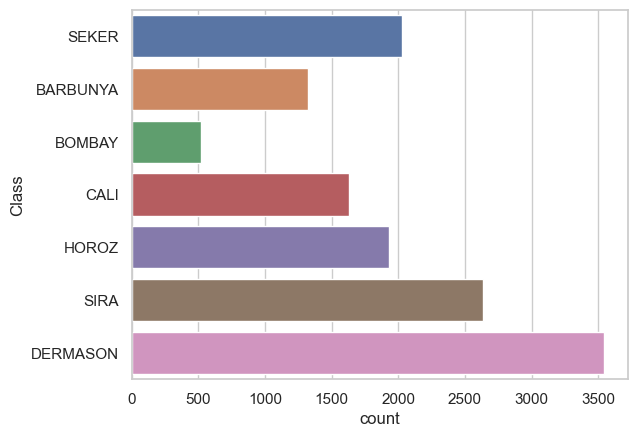

In [101]:
ax = sns.countplot(y=data['Class'], data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv"))

Veri seti içerisindeki 'Class' sütununda SEKER,BARBUNYA,BOMBAY,CALI,HOROZ,SIRA,DERMASON türlerinin olduğunu görmekteyiz.

# SINIFLANDIRMA ALGORİTMALARI

In [1]:
pip install pandas scikit-learn numpy

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [10]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [11]:
features = data.drop('Class', axis=1)
labels = data['Class']

In [12]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# NAIVE BAYES CLASSIFICATION

In [13]:
# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [16]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Naive Bayes Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Naive Bayes Classifier Accuracy: 0.7627326150832517
Precision: 0.7681969291661278
Recall: 0.7653776479998632
F-score: 0.7648550937374462


In [17]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[188   0 158   0  39   0  10]
 [  0 161   0   0   0   0   0]
 [ 90   0 367   0  19   0   3]
 [  0   0   0 868   0 121  54]
 [ 20   0  27  14 465   0  62]
 [  5   0   0 103   5 435  71]
 [  0   0   0  36  64  68 631]]


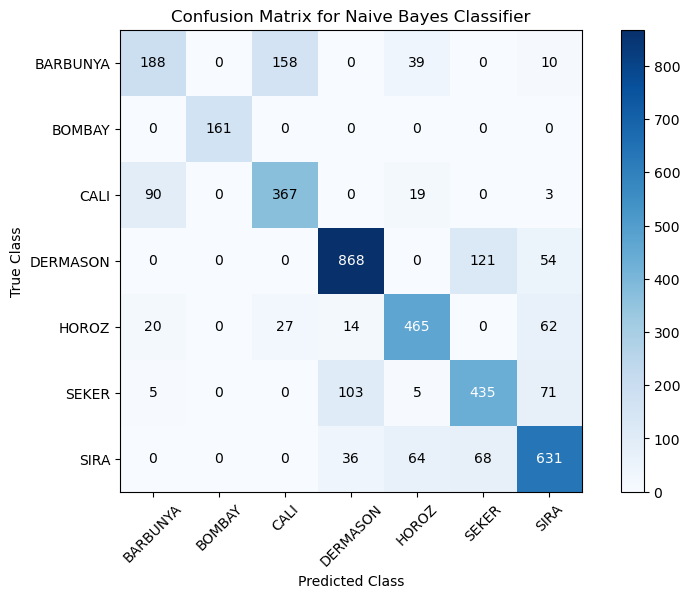

In [18]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# DECISION TREE CLASSIFICATION

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [20]:
# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [22]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Decision Tree Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Decision Tree Classifier Accuracy: 0.8920176297747306
Precision: 0.9066611814488125
Recall: 0.9076150311693786
F-score: 0.9071133406557458


In [23]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[355   0  26   0   2   2  10]
 [  0 161   0   0   0   0   0]
 [ 30   0 430   0  12   2   5]
 [  1   0   0 924   6  24  88]
 [  6   0  16   7 546   0  13]
 [  6   0   1  27   0 568  17]
 [  7   0   4  89  18  22 659]]


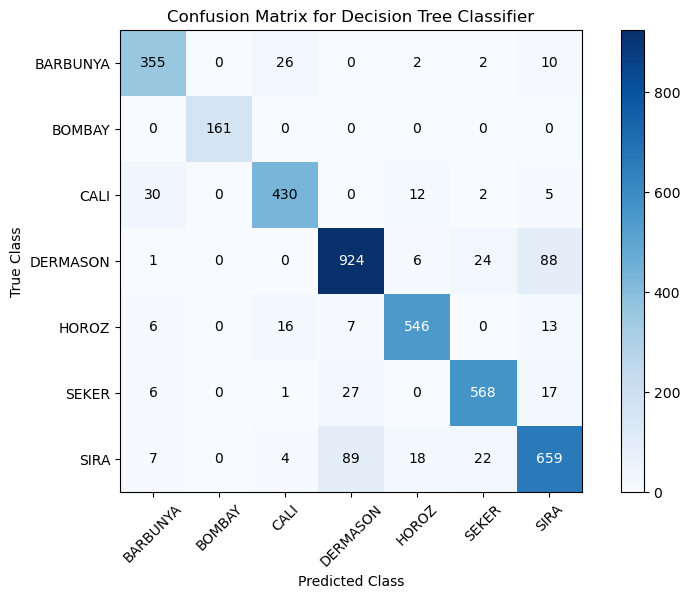

In [24]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# SUPPORT VECTOR MACHINE

In [25]:
from sklearn.svm import SVC

In [26]:
# Create an SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

SVC()

In [27]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [28]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Support Vector Machine Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Support Vector Machine Classifier Accuracy: 0.6324681684622919
Precision: 0.6270707833182038
Recall: 0.6246930045880248
F-score: 0.5976774503974067


In [29]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("SCV Confusion Matrix:")
print(cm)

SCV Confusion Matrix:
[[ 28   0 260   0  96   0  11]
 [  0 161   0   0   0   0   0]
 [ 16   0 420   0  41   0   2]
 [  0   0   0 879   0 122  42]
 [ 18   0  30  13 343  12 172]
 [  0   0   0 221  14 159 225]
 [  0   0   0  39  70  97 593]]


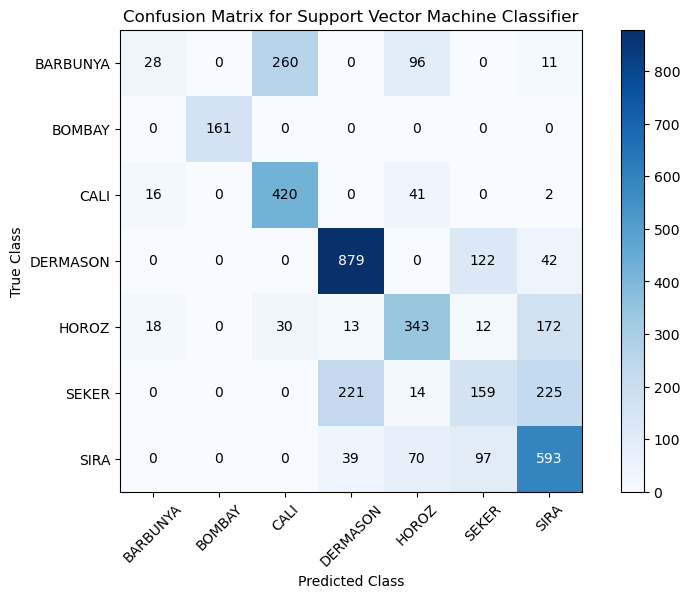

In [30]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Support Vector Machine Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# RANDOM FOREST CLASSIFICATION

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Create a Random Forest classifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [35]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Random Forest Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Random Forest Classifier Accuracy: 0.9211557296767875
Precision: 0.9335387546838538
Recall: 0.9304068715857187
F-score: 0.9319300798511538


In [36]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[356   0  26   0   1   2  10]
 [  0 161   0   0   0   0   0]
 [ 23   0 442   0   9   2   3]
 [  0   0   0 965   2  19  57]
 [  3   0   9   4 559   0  13]
 [  4   0   0  19   0 583  13]
 [  1   0   1  81   9  11 696]]


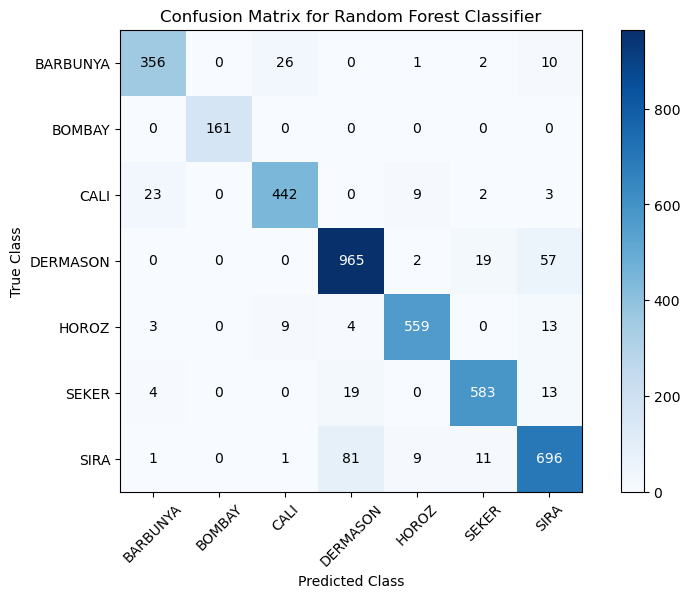

In [37]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# K-NEAREST NEIGHBOOR CLASSIFICATION

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Create a KNN classifier with k=10
classifier = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
# Generate predictions
y_pred = classifier.predict(X_test)

C:\Users\cemre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
# Calculate  accuracy, precision, recall, and F-score 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')

print("KNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

KNN Accuracy: 0.7005386875612145
Precision: 0.7135979804742835
Recall: 0.6982636391465411
F-score: 0.7024377593785757


In [42]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[193   0 133   0  59   0  10]
 [  0 161   0   0   0   0   0]
 [160   0 280   0  36   1   2]
 [  0   0   0 920   0  62  61]
 [ 42   0  25  17 387   1 116]
 [  2   0   0 153   9 338 117]
 [  0   0   0  92  84  41 582]]


<function matplotlib.pyplot.show(close=None, block=None)>

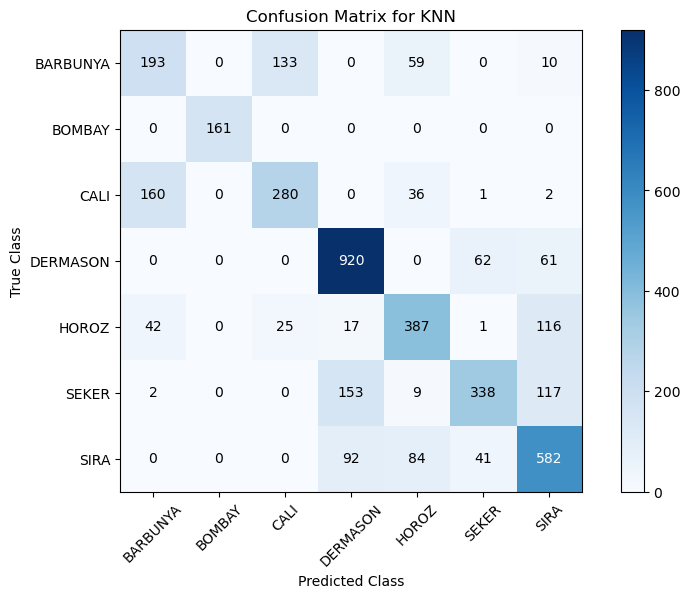

In [43]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show

# TABLO 1

In [138]:
#tablo oluşturmak için gerekli kütüphane
import pandas as pd

# Results of classification methods
results = {
    'Method': ['Naive Bayes','Decision Tree','Support Vector Machine','Random Forest','K-Nearest Neighbors'],
    'Accuracy': [0.7627326150832517,0.8920176297747306,0.6324681684622919,0.9211557296767875,0.7005386875612145],
    'Precision': [0.7681969291661278,0.9066611814488125,0.6270707833182038,0.9335387546838538,0.7135979804742835],
    'Recall': [0.7653776479998632,0.9076150311693786,0.6246930045880248,0.9304068715857187,0.6982636391465411],
    'F-score': [0.7648550937374462, 0.9071133406557458,0.5976774503974067,0.9319300798511538,0.7024377593785757]
}

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the results table
print(df_results)




                   Method  Accuracy  Precision    Recall   F-score
0             Naive Bayes  0.762733   0.768197  0.765378  0.764855
1           Decision Tree  0.892018   0.906661  0.907615  0.907113
2  Support Vector Machine  0.632468   0.627071  0.624693  0.597677
3           Random Forest  0.921156   0.933539  0.930407  0.931930
4     K-Nearest Neighbors  0.700539   0.713598  0.698264  0.702438


x ekseninde sınıflandırma yöntemlerini ve y ekseninde puanları (doğruluk, kesinlik, geri çağırma ve F puanı) içeren bir çubuk grafiği oluşturulmuştur. Her puan farklı bir renkle temsil edilmekte ve hangi rengin hangi puana karşılık geldiğini gösteren bir açıklama görüntülendi. Daha iyi okunabilirlik için x ekseni etiketleri döndürülmüştür.

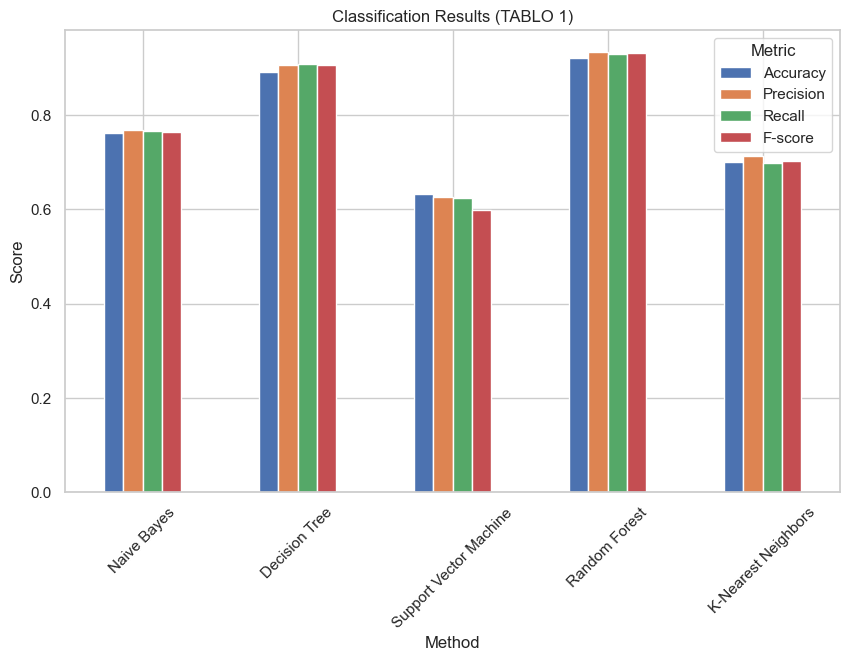

In [140]:
# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Set the Method column as the index
df_results.set_index('Method', inplace=True)

# Plotting the results
df_results.plot(kind='bar', rot=45, figsize=(10, 6))
plt.xlabel('Method')
plt.ylabel('Score')
plt.title('Classification Results (TABLO 1)')
plt.legend(title='Metric')
plt.show()

Sonuçlar tablosu ASCII karakterlerini kullanarak tablo biçiminde görüntülendi. İşlev tabulate, DataFrame'i tablo biçimine dönüştürdü ve headers='keys'argüman, sütun başlıklarının tabloda görüntülenmesini sağladı. Bağımsız değişken tablefmt='fancy_grid', tablonun stilini belirtti.

In [90]:
from tabulate import tabulate

In [91]:

# Convert DataFrame to tabular format
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid')

# Display the tabular results
print(table)

╒════════════════════════╤════════════╤═════════════╤══════════╤═══════════╕
│ Method                 │   Accuracy │   Precision │   Recall │   F-score │
╞════════════════════════╪════════════╪═════════════╪══════════╪═══════════╡
│ Naive Bayes            │   0.762733 │    0.768197 │ 0.765378 │  0.764855 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Decision Tree          │   0.892018 │    0.906661 │ 0.907615 │  0.907113 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Support Vector Machine │   0.632468 │    0.627071 │ 0.624693 │  0.597677 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Random Forest          │   0.921156 │    0.933539 │ 0.930407 │  0.93193  │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ K-Nearest Neighbors    │   0.700539 │    0.713598 │ 0.698264 │  0.702438 │
╘════════════════════════╧════════════╧═════════════╧══════════╧═══════════╛

# REGRESYON MODELLERİ

# LOGISTIC REGRESSION

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

C:\Users\cemre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
# Generate predictions
y_pred = model.predict(X_test)

In [105]:
# Calculate accuracy ,precision, recall, and F-score
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')

print("Logistic Regression Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Logistic Regression Accuracy: 0.705435847208619
Precision: 0.7248227784237582
Recall: 0.7144593010541435
F-score: 0.7185909455199626


In [106]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[216   0 116   0  58   0   5]
 [  0 161   0   0   0   0   0]
 [114   0 340   0  17   5   3]
 [  0   0   0 895   6  61  81]
 [  6   0  27  20 348   8 179]
 [  6   0   0 132   9 390  82]
 [  0   0   0  56  96 116 531]]


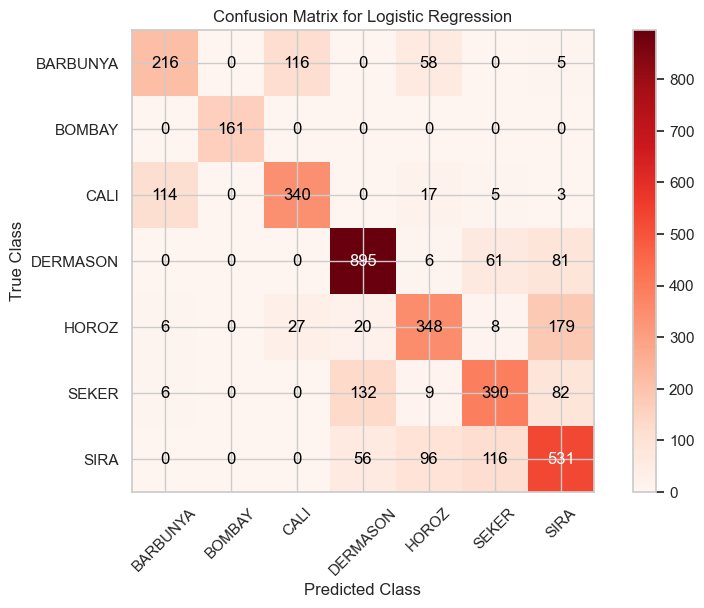

In [109]:
#Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix for Logistic Regression")
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# DECISION TREE REGRESSION

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

In [115]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [116]:
# Convert the 'Class' column to numeric values
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

In [117]:
features = data.drop('Class', axis=1)
labels = data['Class']

In [118]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [119]:
# Create a Decision Tree Regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [120]:
# Generate predictions
y_pred = model.predict(X_test)

In [121]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 0.8866307541625857
R^2 Score: 0.7358416924035662


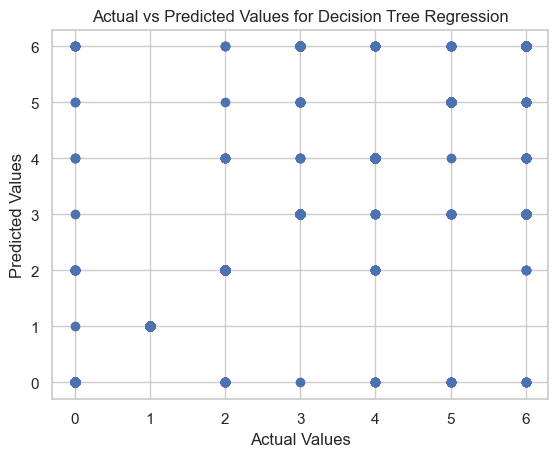

In [123]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.show()

# RIDGE REGRESSİON

In [124]:
from sklearn.linear_model import Ridge

In [125]:
# Create a Ridge Regression model
model = Ridge(alpha=1.0)

# Train the model
model.fit(X_train, y_train)

Ridge()

In [126]:
# Generate predictions
y_pred = model.predict(X_test)

In [127]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 1.9905689430480373
R^2 Score: 0.4069399006509439


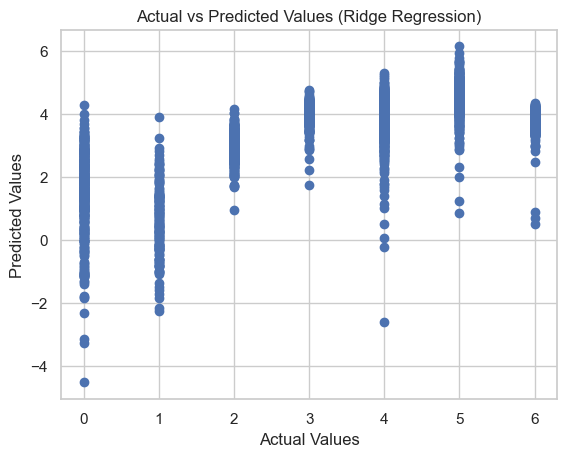

In [128]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.show()

In [131]:
#tablo oluşturmak için gerekli kütüphane
import pandas as pd

# Results of classification methods
results = {
    'Method': ['Decision Tree Regression','Ridge Regression'],
    'Mean Squared Error': [0.8866307541625857,1.9905689430480373],
    'R^2 Score': [0.7358416924035662,0.4069399006509439]
    
}
# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the results table
print(df_results)


                     Method  Mean Squared Error  R^2 Score
0  Decision Tree Regression            0.886631   0.735842
1          Ridge Regression            1.990569   0.406940


In [132]:

# Convert DataFrame to tabular format
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid')

# Display the tabular results
print(table)



╒════╤══════════════════════════╤══════════════════════╤═════════════╕
│    │ Method                   │   Mean Squared Error │   R^2 Score │
╞════╪══════════════════════════╪══════════════════════╪═════════════╡
│  0 │ Decision Tree Regression │             0.886631 │    0.735842 │
├────┼──────────────────────────┼──────────────────────┼─────────────┤
│  1 │ Ridge Regression         │             1.99057  │    0.40694  │
╘════╧══════════════════════════╧══════════════════════╧═════════════╛


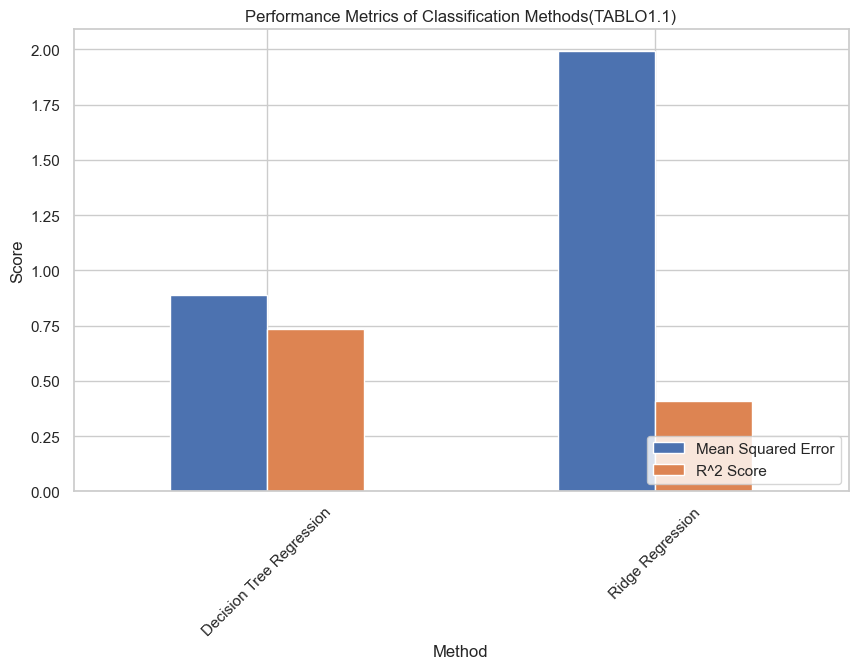

In [136]:
# Plot the results using a bar plot
sns.set(style='whitegrid')
df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics of Classification Methods(TABLO1.1)')
plt.xlabel('Method')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()